In [12]:
import sys
!{sys.executable} -m pip install prophet


  Using cached prophet-1.2.1-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-1.3.0-py3-none-any.whl.metadata (4.2 kB)
  Using cached holidays-0.87-py3-none-any.whl.metadata (50 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.2.1-py3-none-win_amd64.whl (12.1 MB)
Using cached holidays-0.87-py3-none-any.whl (1.3 MB)
Using cached cmdstanpy-1.3.0-py3-none-any.whl (99 kB)
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)

   -------- ------------------------------- 1/5 [importlib_resources]
   -------- ------------------------------- 1/5 [importlib_resources]
   -------- ------------------------------- 1/5 [importlib_resources]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [holidays]
   ---------------- ----------------------- 2/5 [h

In [3]:
!pip install prophet pandas matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/12.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/12.1 MB 8.8 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.1 MB 8.8 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.1 MB 8.8 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.1 MB 8.8 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/12.1 MB 8.8 MB/s eta 0:00:02
   ------ --------------------------------- 2.1/12.1 MB 1.6 MB/s eta 0:00:07
   -------- ------------------------------- 2.6/12.1 MB 1.7 MB/s eta 0:00:06
   ---------- ----------------------------- 3.1/12.1 MB 2.0 MB/s eta 0:00:05
   ---------- ----------------------------- 3.1/12.1 MB 2.0 MB/s eta 0:00:05
   ---------- ----------------------------- 3.1/12.1 MB 2.0 MB/s eta 0:00:05
   ---------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import pandas as pd 
df = pd.read_csv('prophet_train_delhi.csv')

In [2]:
df.head()

,ds,y
0,1942-07-01,30.220000
1,1942-08-01,28.745161
2,1942-09-01,28.266667
3,1942-10-01,27.429032
4,1942-11-01,22.726667


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      717 non-null    object 
 1   y       717 non-null    float64
dtypes: float64(1), object(1)
memory usage: 11.3+ KB


In [5]:
df['ds'] = pd.to_datetime(df['ds'])
df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

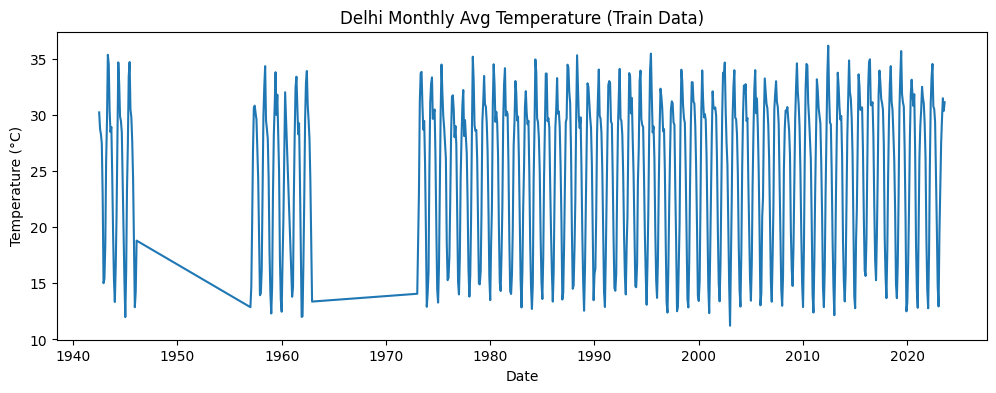

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.plot(df['ds'], df['y'])
plt.title("Delhi Monthly Avg Temperature (Train Data)")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.show()


In [7]:
from prophet import Prophet

# Prophet model (yearly seasonality is MUST for weather)
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

# Fit model
model.fit(df)


18:49:10 - cmdstanpy - INFO - Chain [1] start processing
18:49:11 - cmdstanpy - INFO - Chain [1] done processing


In [8]:
# Create future dataframe (24 months ahead)
future = model.make_future_dataframe(periods=24, freq='MS')

# Predict
forecast = model.predict(future)

# Check output
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)


,ds,yhat,yhat_lower,yhat_upper
711,2023-03-01,23.362351,21.869032,24.870649
712,2023-04-01,29.649205,28.202565,31.253552
713,2023-05-01,32.960642,31.496253,34.417145
714,2023-06-01,34.116706,32.747092,35.485814
715,2023-07-01,31.492429,30.117925,32.960877
716,2023-08-01,30.674309,29.175747,32.045554
717,2023-09-01,29.584016,28.184687,31.072052
718,2023-10-01,26.245319,24.789236,27.683264
719,2023-11-01,20.451037,18.950256,21.957842
720,2023-12-01,15.184408,13.830990,16.556976


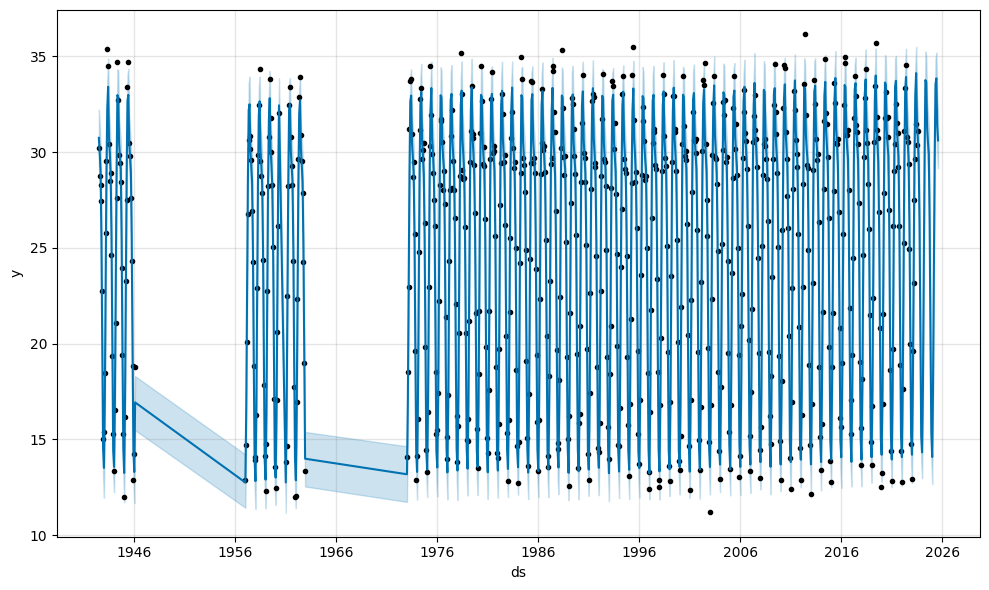

In [9]:
# Overall forecast plot
fig1 = model.plot(forecast)


In [10]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
# sort by date
df = df.sort_values("ds").reset_index(drop=True)

# split
train = df.iloc[:-24].copy()
test  = df.iloc[-24:].copy()

print(len(train), len(test))

693 24


In [11]:
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=False,
    daily_seasonality=False
)

model.fit(train)


20:35:58 - cmdstanpy - INFO - Chain [1] start processing
20:35:58 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future = model.make_future_dataframe(periods=24, freq="MS")
forecast = model.predict(future)

# keep only test dates
pred_test = forecast[['ds', 'yhat']].merge(
    test[['ds', 'y']], on='ds', how='inner'
)

pred_test.head()


,ds,yhat,y
0,2021-09-01,29.889567,29.226667
1,2021-10-01,26.329913,26.158065
2,2021-11-01,20.372731,18.863333
3,2021-12-01,15.384386,14.406452
4,2022-01-01,14.275460,12.774194


In [13]:
prophet_mae  = mean_absolute_error(pred_test['y'], pred_test['yhat'])
prophet_rmse = mean_squared_error(pred_test['y'], pred_test['yhat'], squared=False)

prophet_mae, prophet_rmse


C:\Users\91945\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(np.float64(1.107591765362659), np.float64(1.4167804126385501))

In [14]:
last_train_value = train['y'].iloc[-1]

baseline_pred = np.full(shape=len(test), fill_value=last_train_value)

baseline_mae  = mean_absolute_error(test['y'], baseline_pred)
baseline_rmse = mean_squared_error(test['y'], baseline_pred, squared=False)

baseline_mae, baseline_rmse


C:\Users\91945\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


(np.float64(6.572490399385564), np.float64(9.058274326032576))

In [15]:
comparison = pd.DataFrame({
    "Model": ["Naive Baseline", "Prophet"],
    "MAE": [baseline_mae, prophet_mae],
    "RMSE": [baseline_rmse, prophet_rmse]
})

comparison


,Model,MAE,RMSE
0,Naive Baseline,6.572490,9.058274
1,Prophet,1.107592,1.416780
